In [60]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [61]:
REPLICATION = True

file_path_add = ''
if REPLICATION:
    file_path_add = 'replication/'

In [62]:
datanames = [('wvs_w7', 'wvs'),('pew', 'pew')]

In [63]:
lms = ['mcm', 'gpt2_token_pairs', 'gpt2-medium_token_pairs','gpt2-large_token_pairs', 'gpt3', 'gpt3_token_pairs']
lms = ['mcm', 'gpt2_token_pairs_in']

In [64]:
lms_names = ['SBERT', 'GPT2', 'GPT2-MEDIUM','GPT2-LARGE','GPT3-QA','GPT3-PROBS']
lms_names = ['SBERT', 'GPT2']

In [65]:
lm_scores = ['mcm_score','log prob difference']

In [66]:
main_models = ['mcm','gpt2-large_token_pairs','gpt3_token_pairs']
appendix_models = ['gpt2_token_pairs','gpt2-medium_token_pairs','gpt3']

main_models = ['mcm','gpt2_token_pairs_in']
appendix_models = ['gpt2_token_pairs_in','gpt2-medium_token_pairs_in']

## Main models

In [67]:
def draw_figure(models, prefix):
    fig,axes = plt.subplots(2, len(models), figsize = (4 * len(models), 4), sharey = False, sharex = True)
#     fig.tight_layout()
    plt.subplots_adjust(hspace=0.8)
    for i in range(len(models)):
        for data_index in range(2):
            legend = False
            
            
            lm_index = lms.index(models[i])
            
            lm = lms[lm_index]
            score = lm_scores[lm_index]
            data_name = datanames[data_index]

            emp_column = f'{data_name[1]}_score'
            lm_column = score




            ax = axes[data_index][i]
            data = pd.read_csv(f'../data/{file_path_add}{data_name[0]}_{lm}.csv')
            data = data.loc[(~pd.isna(data[emp_column])) & (data.country !='universal')]


            
            r, p = scipy.stats.pearsonr(data[emp_column], data[lm_column])
            max_value = max([abs(x) for x in data[lm_column]])
            data[lm_column] = [x / max_value for x in data[lm_column]]
            g = sns.regplot(data= data, x = emp_column, y = lm_column, color = 'black', ax = ax)


            topic_col = 'topic' if 'topic' in data.columns else 'question'

            g = sns.scatterplot(data= data, x = emp_column, 
                                y = lm_column, hue = topic_col, 
                                legend = legend, ax = ax,
                               )
            #sns.move_legend(ax,"upper left",bbox_to_anchor=(3,1))
            
            

            
            if p < 0.001:
                
                p = r'$^{***}$'
            elif p < 0.01:
                p = r'$^{**}$'
            elif p < 0.05:
                p = r'$^{*}$'
            else:
                p = ''
     

            
            g.set_title(f'{lms_names[lm_index]} (r = {round(r, 3)}' + p + ')')
            

            y_label = 'Model moral score' if i == 0 else ''
            x_label = 'Human rating' if data_index == 1 else '' 
            ax.set_ylabel(y_label)
            ax.set_xlabel(x_label)

            sns.despine(fig=None, ax=None,left=False, bottom=False, offset=None, trim=False)
    plt.savefig(f'figs/figure_2_{prefix}.png', bbox_inches = 'tight', dpi = 100)
    plt.show()
            
    

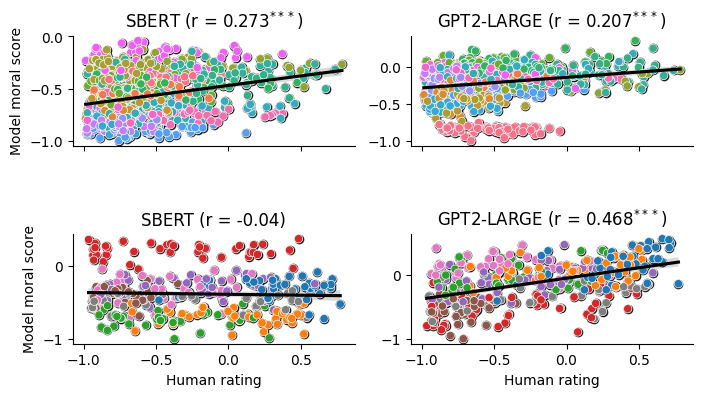

In [68]:
draw_figure(main_models,'main')

In [ ]:
def draw_figure_ab(models, prefix):
    fig,axes = plt.subplots(2, len(models), figsize = (4 * len(models), 4), sharey = False, sharex = True)
#     fig.tight_layout()
    plt.subplots_adjust(hspace=0.8)
    for i in range(len(models)):
        for data_index in range(2):
            legend = False
            
            
            lm_index = lms.index(models[i])
            
            lm = lms[lm_index]
            score = lm_scores[lm_index]
            data_name = datanames[data_index]

            emp_column = f'{data_name[1]}_score'
            lm_column = f'{data_name[1]}_score'




            ax = axes[data_index][i]
            data = pd.read_csv(f'../data/{file_path_add}{data_name[0]}_{lm}.csv')
            data = data.loc[(~pd.isna(data[emp_column])) & (data.country !='universal')]

            
            
            r, p = scipy.stats.pearsonr(data[emp_column], data[lm_column])
            max_value = max([abs(x) for x in data[lm_column]])
            data[lm_column] = [x / max_value for x in data[lm_column]]
            g = sns.regplot(data= data, x = emp_column, y = lm_column, color = 'black', ax = ax)


            topic_col = 'topic' if 'topic' in data.columns else 'question'

            g = sns.scatterplot(data= data, x = emp_column, 
                                y = lm_column, hue = topic_col, 
                                legend = legend, ax = ax,
                               )
            #sns.move_legend(ax,"upper left",bbox_to_anchor=(3,1))
            
            

            
            if p < 0.001:
                
                p = r'$^{***}$'
            elif p < 0.01:
                p = r'$^{**}$'
            elif p < 0.05:
                p = r'$^{*}$'
            else:
                p = ''
     

            
            g.set_title(f'{lms_names[lm_index]} (r = {round(r, 3)}' + p + ')')
            

            y_label = 'Model moral score' if i == 0 else ''
            x_label = 'Human rating' if data_index == 1 else '' 
            ax.set_ylabel(y_label)
            ax.set_xlabel(x_label)

            sns.despine(fig=None, ax=None,left=False, bottom=False, offset=None, trim=False)
    plt.savefig(f'figs/figure_2_{prefix}.png', bbox_inches = 'tight', dpi = 100)
    plt.show()
            
    

FileNotFoundError: [Errno 2] No such file or directory: '../data/replication/pew_gpt2_token_pairs_in.csv'

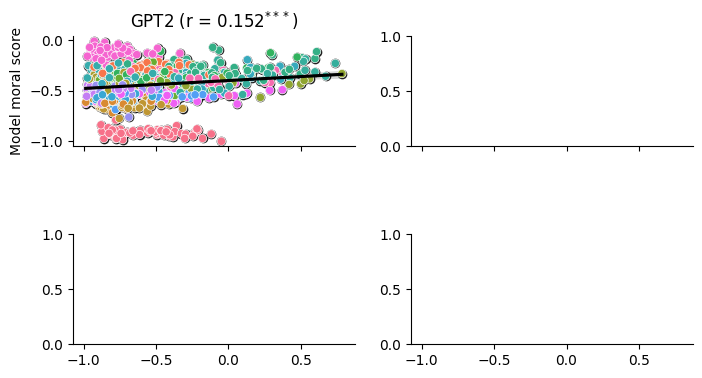

In [69]:
draw_figure(appendix_models,'app')

In [193]:
emp_column = 'log prob difference'
data_culture = pd.read_csv(f'../data/{file_path_add}pew_gpt2_token_pairs.csv')
data_culture = data_culture.loc[(~pd.isna(data_culture[emp_column])) & (data_culture.country !='universal')]

data_subculture = pd.read_csv(f'../data/ablation/pew_gpt2_token_pairs_in.csv')
data_subculture = data_subculture.loc[(~pd.isna(data_subculture[emp_column])) & (data_subculture.country !='universal')]

data_culture_wv7 = pd.read_csv(f'../data/{file_path_add}wvs_w7_gpt2_token_pairs_in.csv')
data_culture_wv7 = data_culture_wv7.loc[(~pd.isna(data_culture_wv7[emp_column])) & (data_culture_wv7.country !='universal')]

data_subculture_wv7 = pd.read_csv(f'../data/ablation/wvs_w7_gpt2_token_pairs_in.csv')
data_subculture_wv7 = data_subculture_wv7.loc[(~pd.isna(data_subculture_wv7[emp_column])) & (data_subculture_wv7.country !='universal')]

In [194]:
df = data_culture.join(data_subculture,lsuffix='_1',rsuffix='_2',how='inner').reset_index()
df_wv7 = data_culture_wv7.join(data_subculture_wv7,lsuffix='_1',rsuffix='_2',how='inner').reset_index()

In [195]:
df = df.rename(columns={'topic_1':'topic',
    'country_1':'culture',
    'log prob difference_1':'score_culture',
    'topic_2':'topic2',
    'country_2':'subculture',
    'log prob difference_2':'score_subculture'})

df_wv7 = df_wv7.rename(columns={'topic_1':'topic',
    'country_1':'culture',
    'log prob difference_1':'score_culture',
    'topic_2':'topic2',
    'country_2':'subculture',
    'log prob difference_2':'score_subculture'})

In [174]:
df_chinese = df[df['culture']=='South Korea']

In [175]:
df = df_chinese

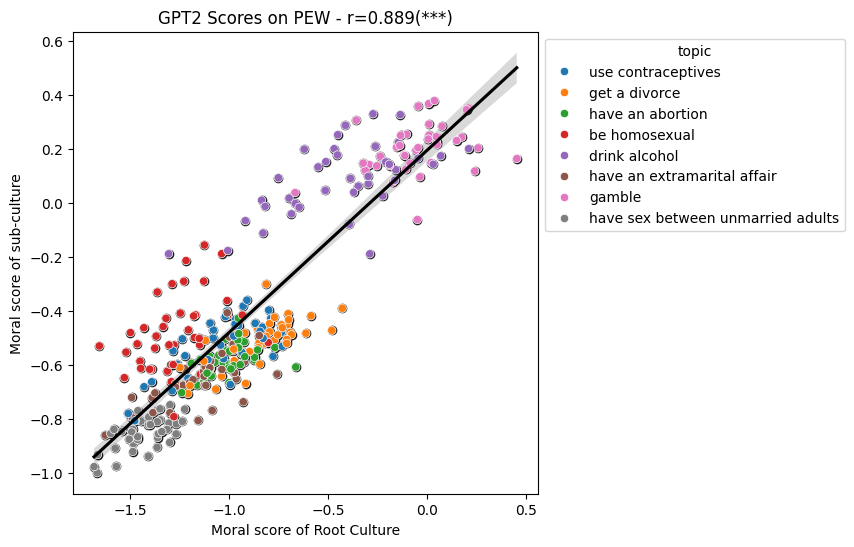

In [200]:
fig, axes = plt.subplots(figsize = (6, 6))

r, p = scipy.stats.pearsonr(df['score_culture'], df['score_subculture'])
max_value = max([abs(x) for x in df['score_subculture']])
df['score_subculture'] = [x / max_value for x in df['score_subculture']]
g = sns.regplot(data= df, x = 'score_culture', y = 'score_subculture', color = 'black')

topic_col = 'topic' if 'topic' in df.columns else 'question'

g = sns.scatterplot(data= df, x = 'score_culture', 
                    y = 'score_subculture', hue = topic_col, 
                    legend = True)
g.set(xlabel="Moral score of Root Culture",ylabel="Moral score of sub-culture", title=f"GPT2 Scores on PEW - r=0.889(***)")
sns.move_legend(axes,"upper left",bbox_to_anchor=(1,1))



In [198]:
r

0.8893211797261146

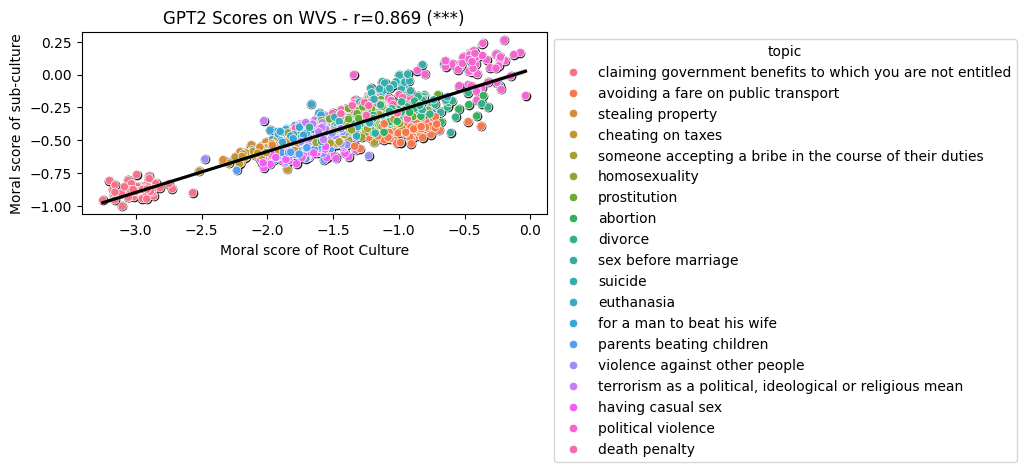

In [201]:
fig, axes = plt.subplots(figsize = (6, 6))
axes.set_aspect('equal')
r, p = scipy.stats.pearsonr(df_wv7['score_culture'], df_wv7['score_subculture'])
max_value = max([abs(x) for x in df_wv7['score_subculture']])
df_wv7['score_subculture'] = [x / max_value for x in df_wv7['score_subculture']]
g = sns.regplot(data= df_wv7, x = 'score_culture', y = 'score_subculture', color = 'black')

topic_col = 'topic' if 'topic' in df_wv7.columns else 'question'

g = sns.scatterplot(data= df_wv7, x = 'score_culture', 
                    y = 'score_subculture', hue = topic_col, 
                    legend = True
                    )
g.set(xlabel="Moral score of Root Culture",ylabel="Moral score of sub-culture", title="GPT2 Scores on WVS - r=0.869 (***)")
sns.move_legend(axes,"upper left",bbox_to_anchor=(1,1))

In [182]:
p

1.9e-322